Let's define the functions again:

In [1]:
def longest_run1(s, c):
    run = 0     
    max_run = 0 
    
    if c == "z":
        s += "y"
    else:
        s += "z"
    
    for ch in s:
        if ch != c:
            max_run = max(run, max_run)
            run = 0
        else:
            run += 1
    
    return max_run
    
def longest_run2(s, ch):
    for longest in range(len(s), -1, -1): 
        cur_run = 0
        for i in range(len(s)): 
            if s[i] == ch:
                cur_run += 1
            else:
                cur_run = 0
                
            if cur_run == longest:
                return longest

    
    return 0


Mostly for fun, let's make a function that returns a random string of `"a"`s and `"b"`s of a specified length.

In [2]:
import random
def get_seq_ab(length):
    s = ""
    for i in range(length):
        if random.random() > .5:
            s += "a"
        else:
            s += "b"
    return s

Here's an example:

In [3]:
s = get_seq_ab(100)
s

'aaaababaaabbaaabaabbaabbababbbabaaabbbbababaababaaaabbbbbbabaabbbbbbbabbababbbbababaabbabbabaabbbbba'

We can now apply either of the version of `longest_run`:

In [4]:
longest_run1(s, "a")

4

In [5]:
longest_run2(s, "a")

4

Let's now write a function to time how long a function like `longest_run()` takes:

In [6]:
import time
def timeit(func, arg1, arg2):
    '''Return the estimate of the runtime, in seconds, of func(arg1, arg2),
    by running the command several times and averaging the results'''
    N = 50
    t0 = time.time()
    for i in range(N):
        func(arg1, arg2)
    t1 = time.time()
    return (t1-t0)/N
        

We'd like to try evaluating the runtimes of the following lengths of the string (note that those are not strictly speaking the *worst-case* runtimes, but they're pretty close, since the maximum runs are of length about 10, usually. If we wanted to be very rigorous about this, we'd just try to run the functions on `length*"b"`, `"a"`. (Of course, we'd have to be able to figure out that that *is* the worst case.)

In [7]:
lengths = list(range(300, 1800, 300))
lengths

[300, 600, 900, 1200, 1500]

In [8]:
times1 = []
times2 = []
for length in lengths:
    s = get_seq_ab(length)
    times1.append(timeit(longest_run1, s, "a"))
    times2.append(timeit(longest_run2, s, "a"))

In [9]:
times1

[5.3715705871582034e-05,
 8.241653442382813e-05,
 0.00010281562805175781,
 0.00014786243438720702,
 0.00017293930053710938]

In [10]:
times2

[0.008533296585083007,
 0.031869001388549804,
 0.07011312007904053,
 0.12912667751312257,
 0.20045154094696044]

Let's plot those results (instructions for making sure you can import `matplotlib.pyplot` are on the course website.)

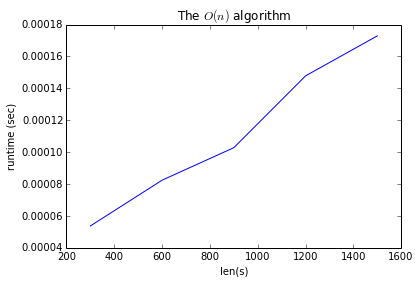

In [11]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(lengths, times1)
plt.xlabel("len(s)")
plt.ylabel("runtime (sec)")
plt.title("The $O(n)$ algorithm")     

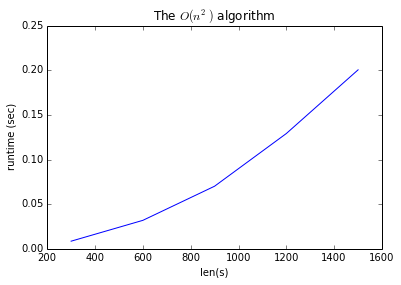

In [12]:
plt.figure(2)
plt.plot(lengths, times2)
plt.xlabel("len(s)")
plt.ylabel("runtime (sec)")
plt.title("The $O(n^2)$ algorithm")     

We *could* try to plot both curves on the same Figure, but it won't look good, because the scales are so different:

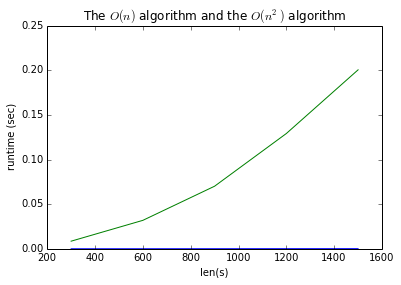

In [13]:
plt.figure(3)
plt.plot(lengths, times1)
plt.plot(lengths, times2)
plt.xlabel("len(s)")
plt.ylabel("runtime (sec)")
plt.title("The $O(n)$ algorithm and the $O(n^2)$ algorithm")     

We'd have to plot the lines on a log-scale to make things make more sense:

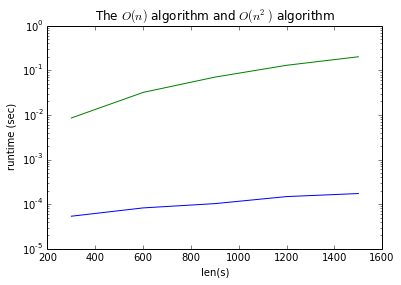

In [15]:
plt.figure(4)
plt.plot(lengths, times1)
plt.plot(lengths, times2)
plt.xlabel("len(s)")
plt.ylabel("runtime (sec)")
plt.yscale("log")
plt.title("The $O(n)$ algorithm and $O(n^2)$ algorithm")     